In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imageall(*images, title=[]):
    
    if len(title) == 0:
        title = [i for i in range(len(images))]
        
    length = len(images)
    ncols = length if length <= 4 else 4
    nrows = (length // 4)+1 if length > 4 else 1
    _, axes = plt.subplots(nrows, ncols, figsize=(4*ncols,12))
    
    for ax, img, label in zip(axes.ravel(), images, title):
        ax.imshow(img, "gray")
        ax.set_title(label)
plt.show()        

In [3]:
ballon = cv.imread("images/hand-coin.jpg", -1)

In [4]:
laplacian = cv.Laplacian(ballon, cv.CV_64F, ksize=1)
sobelx = cv.Sobel(ballon, cv.CV_64F, dx=1, dy=0)
sobely = cv.Sobel(ballon, cv.CV_64F, dx=0, dy=1)

laplacian = np.uint8(np.absolute(laplacian))
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

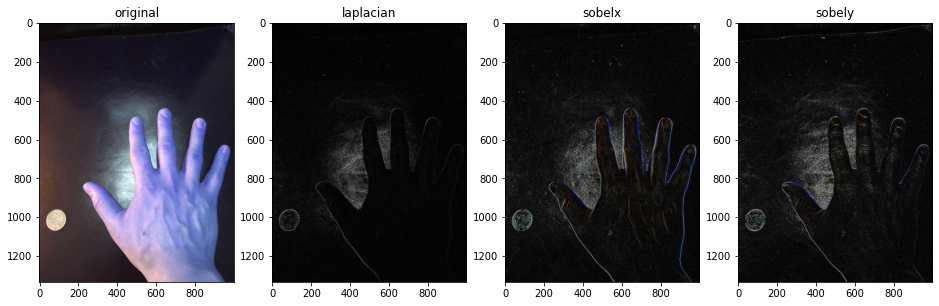

In [10]:
imageall(ballon, laplacian, sobelx, sobely, title=["original", "laplacian", "sobelx", "sobely"])

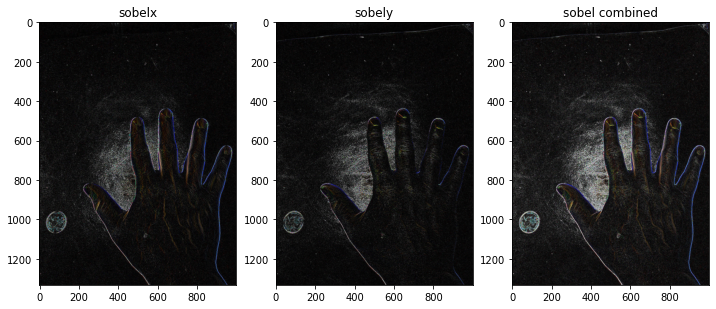

In [104]:
sobelCombined = cv.bitwise_or(sobelx, sobely)

imageall(sobelx, sobely, sobelCombined, title=["sobelx", "sobely", "sobel combined"])

## Edge detection using Canny

<b>The canny edge detection algorithm composed of 5 stages:</b>
1. Noise reduction (Gaussian method)
2. Gradiant calculation (Intensity gradient)
3. Non-maximum supression
4. Double threshold (finding potential edges)
5. Edge tracking by hysteresis

In [105]:
canny = cv.Canny(ballon, 100, 200)

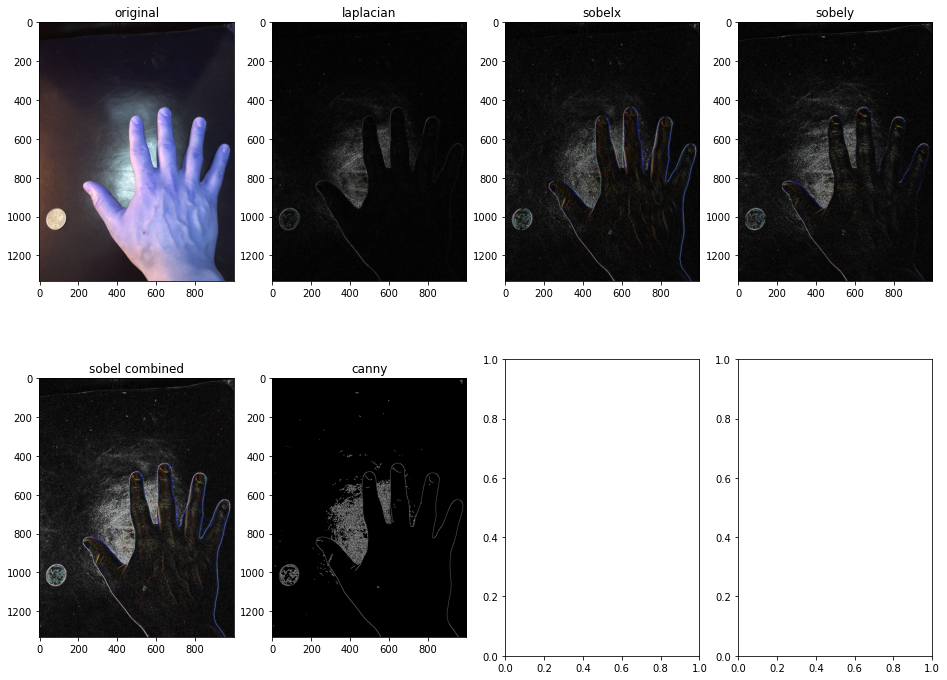

In [106]:
imageall(ballon, laplacian, sobelx, sobely, sobelCombined, canny, title=["original", "laplacian", "sobelx", "sobely", "sobel combined", "canny"])

In [110]:
import jupyter_core
jupyter_core.paths.jupyter_config_dir()

'/home/ritik/.jupyter'